In [4]:
# Mounting the drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# Problem 1: K means clustering


#### Perform k means clustering on the [r,g,b] pixel data of the image 'chilis.jpg' for k = 3 clusters. Terminate the algorithm when the cluster means do not change in an iteration. 

You can initialize the cluster centers as:
*   $c_1=[255, 0, 0]$
*   $c_2=[0,0,0]$
*   $c_3=[255,255,255]$

In order to visualise the output, replace all pixels corresponding to a cluster with it's mean value. Display this image along with the cluster means.

Code the algorithm from scratch without using libraries like scikit-learn.  




In [ ]:
#Importing Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist 
import tqdm.notebook as tq

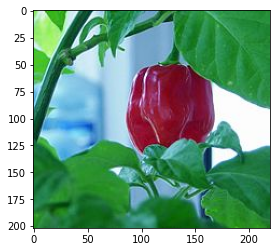

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/P2/chilis.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img);

In [ ]:
#Ignore
#Choosing Random Centroids
idx = np.random.choice(len(img), 3, replace=False)
centroids = img[idx, :] #Step 1
centroids

In [ ]:
#kmeans function
def kmeans(x,k):
  centroids = np.array([[255,0,0],[0,0,0],[255,255,255]])
  distances = cdist(x,centroids,'euclidean')
  points = np.array([np.argmin(i) for i in distances])
  # for _ in tq.tqdm(range(n_iter)): 
  iter = True
  while iter:
        t_centroids = []
        for j in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==j].mean(axis=0) 
            t_centroids.append(temp_cent)
        # Checking change in Centroids
        if np.array_equal(np.array(t_centroids),centroids):
          iter = False
        else:
          centroids = np.vstack(t_centroids) #Updated Centroids 
          distances = cdist(x, centroids ,'euclidean')
          points = np.array([np.argmin(i) for i in distances])
  return points,centroids

In [ ]:
#Reshaping into 2d array
pxl_val = img.reshape((-1, 3))
# convert to float
pxl_val = np.float32(pxl_val)
points,centers = kmeans(pxl_val,3)

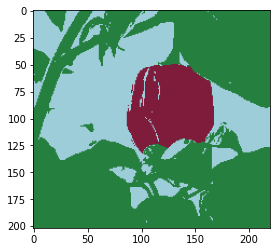

In [ ]:
centers = np.uint8(centers)
#Making everything the colour of nearest centroid
segmented_data = centers[points.flatten()]
# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((img.shape))
plt.imshow(segmented_image);

#Problem 2: S.V.M

The Support Vector Machine(S.V.M) algorithm is to find the hyperplane in the N-dimensional space (N-Number of features) that distinctly classifies the data points.

To separate the two classes of data points, there are many possible hyperplanes that could be chosen. The objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.

##Problem 2, Part A: Linear S.V.M


Use dataset A (``data_prob2_parta.csv``)  for this part of the question. The given CSV file has three columns: column 1 is the first input feature, column 2 is the second input feature and column 3 is the output label. Split the dataset into the training data (75%) and testing data(25%) randomly.




In [2]:
#Importing required Libraries
from sklearn.model_selection import train_test_split
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
pd.options.mode.chained_assignment = None
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

In [ ]:
#Importing the data into a dataframe
csv_a = '/content/drive/MyDrive/Colab Notebooks/P2/data_prob2_parta.csv'
with open(csv_a) as f:
  df_a = pd.read_csv(csv_a,sep=',',header=None)
df_a = df_a.drop(0).reset_index(drop=True).astype(float).rename(columns ={0:'Input 1',1:'Input 2',2:'Output'})
df_a

,Input 1,Input 2,Output
0,39.146901,81.434567,0.0
1,18.251029,15.692596,1.0
2,10.292564,19.760821,1.0
3,16.880855,27.446969,1.0
4,42.867947,83.981230,0.0
...,...,...,...
2095,36.830123,64.863953,0.0
2096,35.930707,76.592258,0.0
2097,21.806859,24.421647,1.0
2098,12.089820,10.534441,1.0


In [ ]:
# Train-Test Split
split = np.random.rand(len(df_a)) < 0.75
train_a = df_a[split]
test_a = df_a[~split]

In [ ]:
traindata_a = train_a.to_numpy(dtype='float32')
testdata_a = test_a.to_numpy(dtype='float32')

Visualize the training data with a scatter plot (input feature 1 on the X axis, input feature 2 on the Y axis and color the points according to their labels)

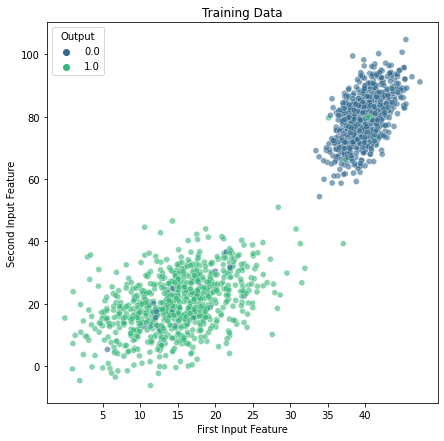

In [ ]:
plt.figure(figsize =(7,7))
p1 = sns.scatterplot(x='Input 1',y='Input 2',hue='Output',data=train_a,palette='viridis',alpha=0.6);
p1.set(xticks=np.arange(5,45,5),yticks=np.arange(0,120,20))
p1.set(xlabel='First Input Feature')
p1.set(ylabel='Second Input Feature')
plt.title('Training Data')
plt.show()

Build the Support Vector Machine  model using the 
training data. The scikit
library can be used to build the model.

In [ ]:
#Finding the best linear regularisation parameter
C_range = np.logspace(-3, 2, 13)
param_grid = dict(C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(svm.SVC(kernel='linear'), param_grid=param_grid, cv=cv)
grid.fit(traindata_a[:,0:2],traindata_a[:,2])

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 0.001} with a score of 0.98


In [ ]:
clf = svm.SVC(C=grid.best_params_['C'],kernel='linear').fit(traindata_a[:,0:2],traindata_a[:,2])

Print the parameter and support vectors.


In [ ]:
print("Regularization parameter (C): %s"%grid.best_params_['C'])

Regularization parameter (C): 0.001


In [ ]:
clf.support_vectors_.shape

(121, 2)

Print the final accuracy on the test data.


In [ ]:
test_a['Pred Output'] = clf.predict(testdata_a[:,0:2])
print('Accuracy: ',clf.score(testdata_a[:,0:2],testdata_a[:,2]))

Accuracy:  0.9744094488188977


Plot the scatter plot for the test data. On top of this scatter plot, plot the separating hyperplane and parallels to the hyperplane that pass through the support vectors.





In [ ]:
########Another method for plotting seperatinmg hyperplane and parallels to the hyperplane##########
### Do not Execute. Better method in the below cell ###
w_b = clf_l.coef_[0]
b = -w_b[0] / w_b[1]
xx = np.arange(-0.5, 0.7,0.05)
yy = b * xx - (clf_l.intercept_) / w_b[1]
sns.scatterplot(data=test_b,x='Input 1',y='Input 2',hue='Output',palette='magma',alpha=0.6)
plt.plot(xx, yy, 'k-')
### plot the line, the points, and the nearest vectors to the plane
plt.figure(figsize = (7,7))
plt.clf()
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
# plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
#             facecolors='none', zorder=10, edgecolors='k',
#             cmap=cm.get_cmap('RdBu'))
sns.scatterplot(data=test_a,x='Input 1',y='Input 2',hue='Output',palette='magma',alpha=0.6)
plt.title('Testing Data with Decision Boundary');

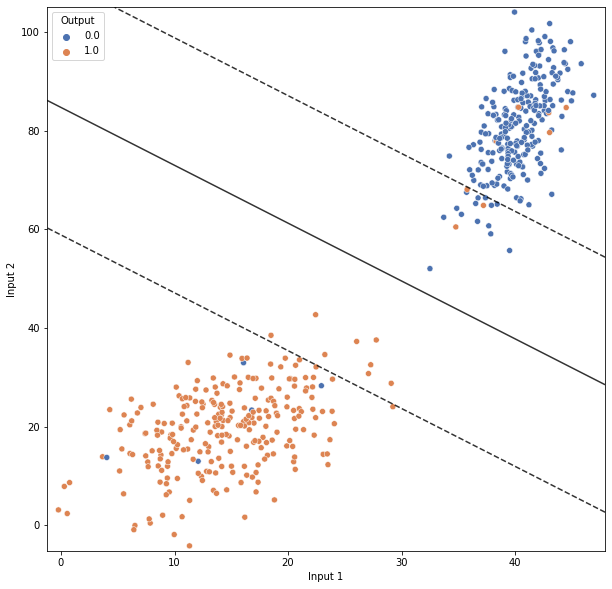

In [ ]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contour(xx, yy, Z, colors='k',
               levels=[-1, 0, 1], **params,
               linestyles=['--', '-', '--'])
    return out

def plot_support(ax,model):
    ax.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1],s=300, facecolors='none',edgecolors='black');

fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = testdata_a[:, 0], testdata_a[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy,alpha=0.8)
sns.scatterplot(data=test_a,x='Input 1',y='Input 2',palette='deep',hue='Output');

##Problem 2, Part B: Non-linear S.V.M

 Use Dataset B (``data_prob2_partb.csv``) for this part of the question. The given CSV file has three columns: column 1 is the first input feature, column 2 is the second input feature and column 3 is the output label. Split the dataset into training data (75%) and testing data (25%) randomly.


In [ ]:
#Importing data into a dataframe
csv_b = '/content/drive/MyDrive/Colab Notebooks/P2/data_prob2_partb.csv'
with open(csv_b) as f:
  df_b = pd.read_csv(csv_b,sep=',',header=None)
df_b = df_b.drop(0).reset_index(drop=True).astype(float).rename(columns ={0:'Input 1',1:'Input 2',2:'Output'})
df_b

,Input 1,Input 2,Output
0,-0.973170,-0.313476,0.0
1,-0.166915,-0.759030,1.0
2,-1.002325,-0.058528,0.0
3,-0.384879,0.868446,0.0
4,0.586091,0.487222,1.0
...,...,...,...
2095,-0.542774,-0.826382,0.0
2096,-0.408628,-0.936934,0.0
2097,-0.935522,-0.490955,0.0
2098,0.569535,-0.571724,1.0


In [ ]:
#Train Test Split
split_b = np.random.rand(len(df_b)) < 0.75
train_b = df_b[split_b]
test_b = df_b[~split_b]

In [ ]:
traindata_b = train_b.to_numpy(dtype='float32')
testdata_b = test_b.to_numpy(dtype='float32')

Visualize the training data with a scatter plot (input feature 1 on the X axis, input feature 2 on the Y axis and color the points according to their labels).


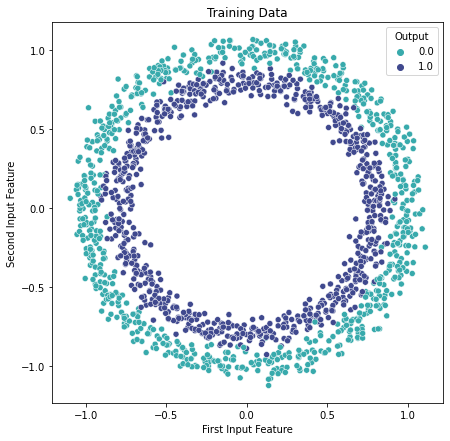

In [ ]:
plt.figure(figsize =(7,7))
p1 = sns.scatterplot(x='Input 1',y='Input 2',hue='Output',palette='mako_r',data=train_b);
p1.set(xlabel='First Input Feature')
p1.set(ylabel='Second Input Feature')
plt.title('Training Data')
plt.show()



Write the code for
choosing best hyperparameters for each of the kernel type.
In text cell after that report the following numbers:
Report the best kernel parameters, regularisation parametes, accuracy for ***linear***, ***RBF*** and ***poly*** kernels(Linear kernels has no kernel parameter).

Note: The scikit library can be used in this case.

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
def best_params(kernel):
  #Taking too much time for 'poly' kernel if we take 10*10 points.
  #Instead Took 5*3 predefined points for thr Grid Search.
  # C_range = np.logspace(-2, 1, 10)
  C_range = [0.001, 0.01, 0.1, 1, 10]
  if kernel == 'linear':
    param_grid = dict(C=C_range)
  # elif kernel == 'poly':
  #   gamma_range = np.logspace(-2, 2, 10)
  #   degree_range = np.arange(2,5,1)
  #   param_grid = dict(gamma=gamma_range, C=C_range,degree=degree_range)
  else:
    # gamma_range = np.logspace(-2, 2, 10)
    gamma_range = [0.01, 0.1, 1,5]
    param_grid = dict(gamma=gamma_range, C=C_range)
    
  cv = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=42)
  grid = GridSearchCV(svm.SVC(kernel=kernel,degree = 3), param_grid=param_grid, cv=cv)
  grid.fit(traindata_b[:,0:2],traindata_b[:,2])
  print("The best parameters for '%s' kernel are %s with a score of %0.2f"
          % (kernel,grid.best_params_, grid.best_score_))
  if kernel == 'linear':
    return (grid.best_params_['C'],grid.best_score_)
  # elif kernel == 'poly':
  #   return (grid.best_params_['C'],grid.best_params_['gamma'],grid.best_params_['degree'],grid.best_score_)
  else:
    return (grid.best_params_['C'],grid.best_params_['gamma'],grid.best_score_)

In [ ]:
c_l,score_l = best_params('linear')

The best parameters for 'linear' kernel are {'C': 0.001} with a score of 0.51


In [ ]:
c_rbf,g_rbf,score_rbf = best_params('rbf')

The best parameters for 'rbf' kernel are {'C': 10, 'gamma': 0.1} with a score of 0.98


In [ ]:
c_poly,g_poly,score_poly = best_params('poly')

The best parameters for 'poly' kernel are {'C': 0.001, 'gamma': 5} with a score of 0.57


In [ ]:
#Getting high value of intercept if intercept not made zero
clf_l = LinearSVC(C=c_l,fit_intercept=False).fit(traindata_b[:,0:2],traindata_b[:,2])

In [ ]:
clf_rbf = svm.SVC(C=c_rbf,gamma=g_rbf,kernel='rbf').fit(traindata_b[:,0:2],traindata_b[:,2])

In [ ]:
#Degree 2 polynomial almost perfectly fits the data due to the nature of even polynomials on circular data
#Hence took degree 3 default for visual purposes
clf_p = svm.SVC(C=1,gamma=10,kernel='poly',degree=3).fit(traindata_b[:,0:2],traindata_b[:,2])

In [ ]:
print('Accuracy of Linear Kernel:',clf_l.score(testdata_b[:,0:2],testdata_b[:,2]))
print('Accuracy of RBF Kernel:',clf_rbf.score(testdata_b[:,0:2],testdata_b[:,2]))
print('Accuracy of Poly Kernel:',clf_p.score(testdata_b[:,0:2],testdata_b[:,2]))

Accuracy of Linear Kernel: 0.4980237154150198
Accuracy of RBF Kernel: 0.974308300395257
Accuracy of Poly Kernel: 0.575098814229249


Report your observation in the given table:





Kernels | Linear | RBF | Poly
--- | --- | --- |---
Kernel Parameters |None  |0.1 | 5
Regularization Parameters |0.001  | 10| 0.001
Accuracy |  0.498| 0.974 |0.575





Plot the scatter plot for the test data.On top of this scatter plot, plot the decision regions for each of the kernels with their best fit

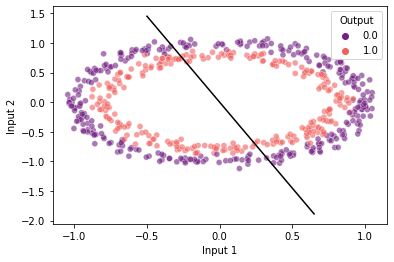

In [ ]:
#Checking whether the linear fit is within the contour range
w_b = clf_l.coef_[0]
b = -w_b[0] / w_b[1]
xx = np.arange(-0.5, 0.7,0.05)
yy = b * xx - (clf_l.intercept_) / w_b[1]
sns.scatterplot(data=test_b,x='Input 1',y='Input 2',hue='Output',palette='magma',alpha=0.6)
plt.plot(xx, yy, 'k-')

In [ ]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 0.1, x.max() + 0.1
    y_min, y_max = y.min() - 0.1, y.max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy,color, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # print(xx.shape,yy.shape)
    Z = Z.reshape(xx.shape)
    out = ax.contour(xx, yy, Z,colors=[color],**params)
    return out

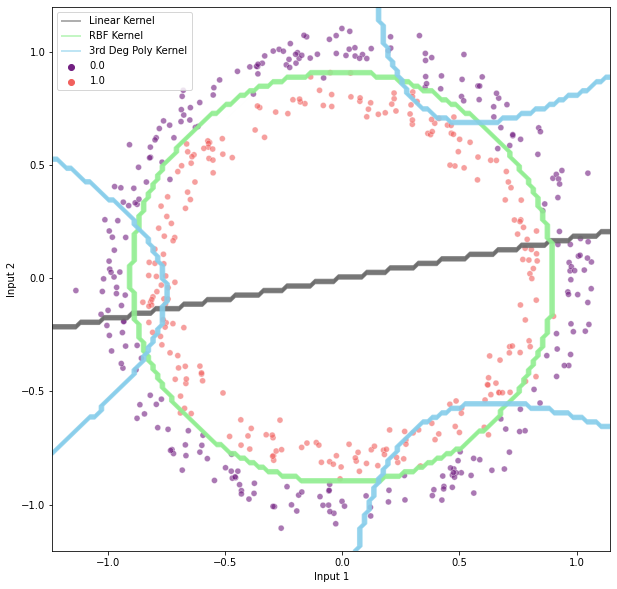

In [ ]:
#Plots
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = testdata_b[:, 0], testdata_b[:, 1]
xx, yy = make_meshgrid(X0, X1)

CS_l = plot_contours(ax, clf_l, xx, yy,'dimgrey',alpha=0.7)
CS_rbf = plot_contours(ax, clf_rbf, xx, yy,'lightgreen',alpha=0.7)
CS_p = plot_contours(ax, clf_p, xx, yy,'skyblue',alpha=0.7)

CS_l.collections[0].set_label('Linear Kernel')
CS_rbf.collections[1].set_label('RBF Kernel')
CS_p.collections[2].set_label('3rd Deg Poly Kernel')

sns.scatterplot(data=test_b,x='Input 1',y='Input 2',palette='magma',hue='Output',alpha=0.6)
plt.legend(loc='upper left');

##Problem 2, Part C: Multiclass Classification

Use Dataset C (``data_prob3_partc.csv``) for this part of the question. The given CSV file has three columns: column 1 is the first input feature, column 2 is the second input feature and column 3 is the output label. Split the dataset into training data (75%) and testing data (25%) randomly.


In [5]:
#Importing data into a dataframe
csv_c = '/content/drive/MyDrive/Colab Notebooks/P2/data_prob2_partc.csv'
with open(csv_c) as f:
  df_c = pd.read_csv(csv_c,sep=',',header=None)
df_c = df_c.drop(0).reset_index(drop=True).astype(float).rename(columns ={0:'Input 1',1:'Input 2',2:'Output'})
df_c

,Input 1,Input 2,Output
0,-1.396342,0.084977,0.0
1,1.878268,-0.190694,1.0
2,-1.910399,1.315481,1.0
3,1.517623,0.213485,0.0
4,-3.422065,-1.020059,2.0
...,...,...,...
1995,0.591822,-0.216805,0.0
1996,-4.533279,-3.143200,2.0
1997,-0.735243,-1.267049,0.0
1998,0.082332,0.404052,0.0


In [6]:
#Train Test Split
split_c = np.random.rand(len(df_c)) < 0.75
train_c = df_c[split_c]
test_c = df_c[~split_c]

In [7]:
traindata_c = train_c.to_numpy(dtype='float32')
testdata_c = test_c.to_numpy(dtype='float32')

Visualize the training data with a scatter plot (input feature 1 on the X axis, input feature 2 on the Y axis and color the points according to their labels).

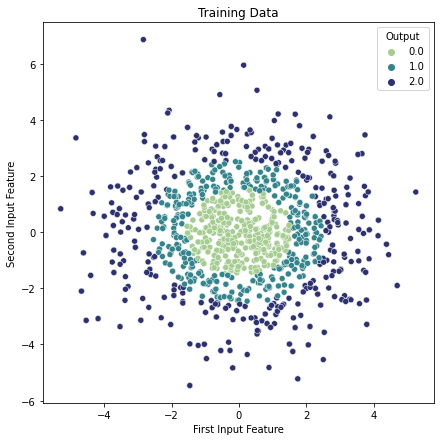

In [8]:
plt.figure(figsize =(7,7))
p3 = sns.scatterplot(x='Input 1',y='Input 2',hue='Output',palette='crest',data=train_c);
# pd.set(xticks=np.arange(5,45,5),yticks=np.arange(0,120,20))
plt.title('Training Data')
p3.set(xlabel='First Input Feature')
p3.set(ylabel='Second Input Feature')
plt.show()

Build the Support Vector Machine  model using the 
training data. The scikit
library can be used to build the model.

In [9]:
#Findin Best Parameters(Gamma and C)
C_range = np.logspace(-2, 1, 13)
gamma_range = np.logspace(-2, 2, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
# param_grid = dict(C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=42)
grid = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
grid.fit(traindata_c[:,0:2],traindata_c[:,2])
print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 10.0, 'gamma': 10.0} with a score of 0.99


In [10]:
clf_c = svm.SVC(C=grid.best_params_['C'],gamma=grid.best_params_['gamma'],kernel='rbf').fit(traindata_c[:,0:2],traindata_c[:,2])

Print the final accuracy on the test data.

In [14]:
#Accuracy
print('Accuracy :',clf_c.score(testdata_c[:,0:2],testdata_c[:,2]))

Accuracy : 0.995850622406639


Plot the scatter plot for the test data. On top of this scatter plot, plot the decision boundary.

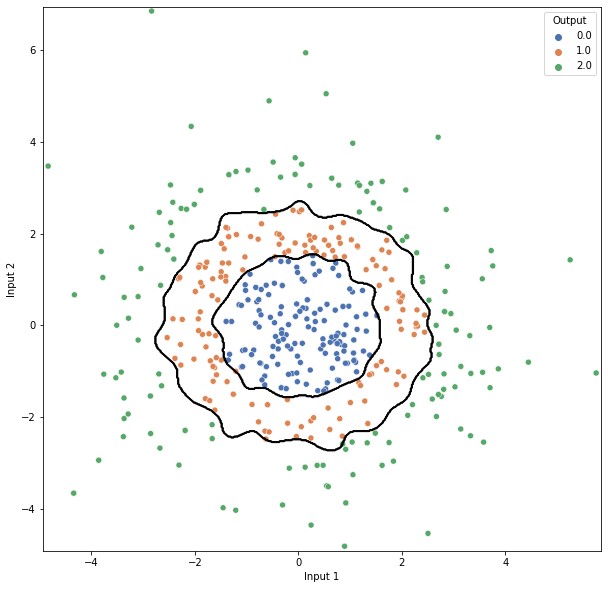

In [12]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 0.1, x.max() + 0.1
    y_min, y_max = y.min() - 0.1, y.max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # print(xx.shape,yy.shape)
    Z = Z.reshape(xx.shape)
    out = ax.contour(xx, yy, Z,colors=['black'],**params)
    return out

#Plots
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
# title for the plots
title = ('Decision surface of rbf SVC ')
# Set-up grid for plotting.
X0, X1 = testdata_c[:, 0], testdata_c[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf_c, xx, yy,alpha=0.8)
sns.scatterplot(data=test_c,x='Input 1',y='Input 2',palette='deep',hue='Output');

# Problem 3 : Principal Component Analysis

#### In this exercise you will perform face recognition using eigenfaces. Face recognition can be formulated as a classification task, where the inputs are images and the outputs are people's names.

In [ ]:
#Importing Required Libraries
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import cm
# import seaborn as sns

Load grayscale images from the LFW - Labeled faces in the Wild dataset using scikit-learn. To reduce the number of classes, retain pictures of only those people that have atleast 100 different pictures. (already done for you here) </br></br>
Report the number of images and the size of each image.

In [ ]:
lfw_people = fetch_lfw_people(min_faces_per_person=100)

In [ ]:
print("Number of Images:",len(lfw_people.data))
print('Size of Images:',lfw_people.images[1].shape)
print('Number of Classes:',len(lfw_people.target_names))

Number of Images: 1140
Size of Images: (62, 47)
Number of Classes: 5


In [ ]:
lfw_people.data.shape

(1140, 2914)

In [ ]:
h,w = lfw_people.images[1].shape

Split the dataset into training and test sets in the ratio - 7:3.

In [ ]:
#Image data and corresponding names
img = lfw_people.data
name = lfw_people.target

In [ ]:
img_tr, img_ts, name_tr, name_ts = train_test_split(img, name, test_size=0.3, random_state=42)

Use scikit-learn's PCA class to perform dimensionality reduction on the training set images. Reduce the dimensions to 100 principal components. These principal components are the eigenfaces.

In [ ]:
#Using PCA
n_comp = 100
pca = PCA(n_components=n_comp, svd_solver='randomized').fit(img_tr)

Reshape the principal eigenvectors into images and visualize the eigenfaces. Display 10 eigenfaces. 

In [ ]:
eigenfaces = pca.components_.reshape(n_comp,h,w)

In [ ]:
pca.components_.shape

(100, 2914)

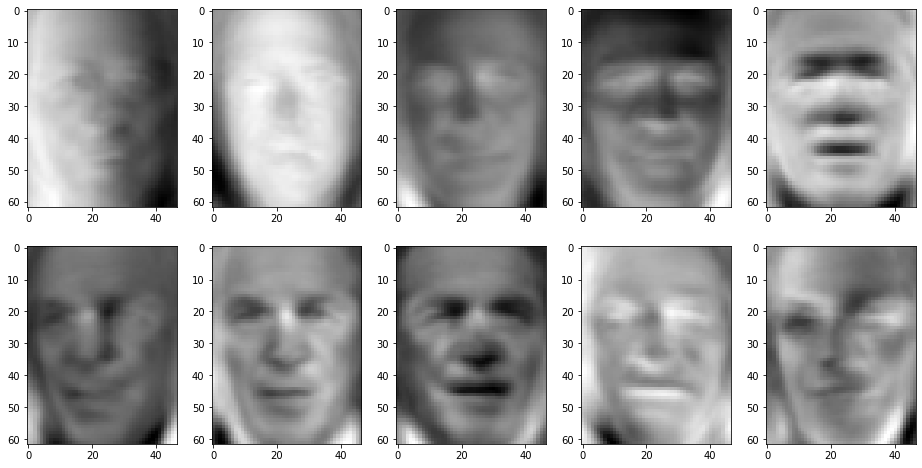

In [ ]:
#Plotting Eigen Faces
plt.figure(figsize=(16,8))
plt.tight_layout()
# plt.subplots_adjust(left=0.125,bottom=0.1, right=0.9,top=0.9,wspace=0.2, hspace=0.35)
for i in range(1,11):
  plt.subplot(2,5,i)
  plt.imshow(eigenfaces[i].reshape((h, w)),cmap=plt.cm.gray);

Reconstruct any image (from training / test set) by projecting the image onto the new eigenface space. </br>
*   Display the reconstructed image along with the original image.
*   Report the reconstruction mean squared error. 

In [ ]:
#Reducing the dimensionality of the images
img_tr_pca = pca.transform(img_tr)
img_ts_pca = pca.transform(img_ts)

In [ ]:
#Reconstructing image using built-in method
reconstr = pca.inverse_transform(img_tr_pca)[1]

In [ ]:
#Reconstructing image manually
reconstr_m = np.matmul(pca.components_.T,np.matmul(pca.components_,img_tr[1]))

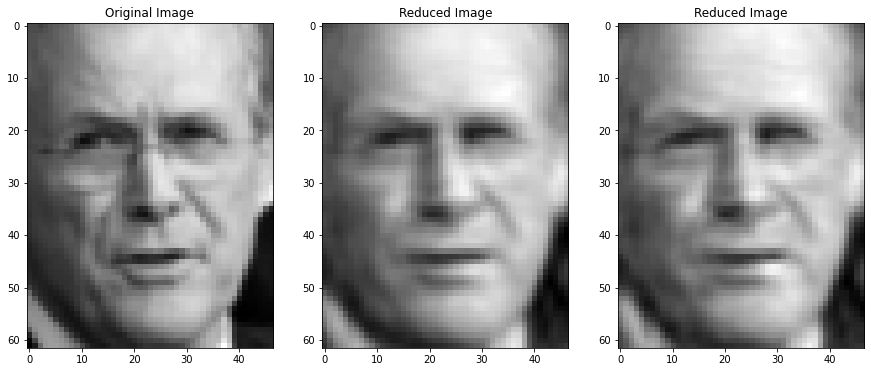

In [ ]:
#Plotting Reconstructed Image
plt.figure(figsize=(15,10))
plt.subplot(131)
plt.title('Original Image')
plt.imshow(img_tr[1].reshape((h, w)),cmap=plt.cm.gray)
plt.subplot(132)
plt.title('Reduced Image')
plt.imshow(reconstr.reshape((h, w)),cmap=plt.cm.gray);
plt.subplot(133)
plt.title('Reduced Image')
plt.imshow(reconstr_m.reshape((h, w)),cmap=plt.cm.gray);

In [ ]:
#Mean Squared Error
mse = mean_squared_error(img_tr[1], reconstr.flat)
mse

99.613846

In [ ]:
mse/img_tr.mean()

0.7476805

Now that you have a reduced-dimensionality vector, train a single hidden layer neural network classifier with the person names as outputs and the reduced image vectors as input. You can use scikit-learn's MLPClassifier, with the number of neurons in the hidden layer set to 1024. 

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

In [ ]:
#Training Neural Network
clf = MLPClassifier(hidden_layer_sizes=1024).fit(img_tr_pca, name_tr)

In [ ]:
name_pred = clf.predict(img_ts_pca)

Now test your network's predictions on the test set and print out the precision, recall and support values for each class. Also display the images (say, 10 test images) along with the true and the  predicted label.

In [ ]:
#Classification Report
print(classification_report(name_ts, name_pred, target_names=lfw_people.target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.91      0.79      0.85        78
  Donald Rumsfeld       0.77      0.63      0.70        38
    George W Bush       0.84      0.91      0.87       159
Gerhard Schroeder       0.72      0.60      0.65        30
       Tony Blair       0.67      0.81      0.73        37

         accuracy                           0.82       342
        macro avg       0.78      0.75      0.76       342
     weighted avg       0.82      0.82      0.81       342



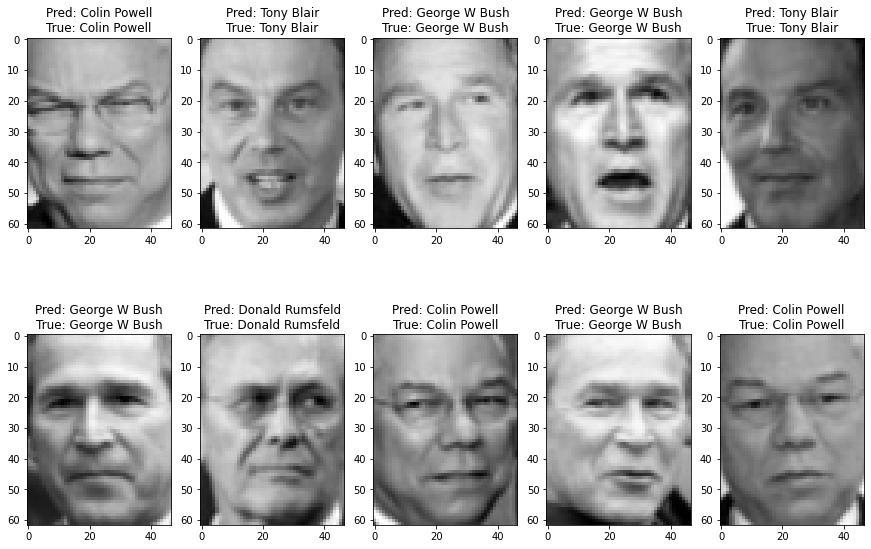

In [ ]:
plt.figure(figsize=(15,10))
for i in range(1,11):
  plt.subplot(2,5,i)
  plt.imshow(img_ts[i+5].reshape((h, w)),cmap=plt.cm.gray)
  plt.title('Pred: %s\nTrue: %s'%(lfw_people.target_names[name_pred[i+5]],lfw_people.target_names[name_ts[i+5]]))

Repeat all the above steps for different values of number of principal components or eigen faces - 100, 150 and 200. Explain the change in the proportion of the total variance explained by the eigenfaces and reconstruction mean squared error with increase in the number of eigenfaces.

In [ ]:
#Repeating for 150,200 and 500 PCA components
def face_class(num_comp):
  pcaf = PCA(n_components=num_comp, svd_solver='randomized').fit(img_tr)
  img_tr_pcaf = pcaf.transform(img_tr)
  img_ts_pcaf = pcaf.transform(img_ts)

  # eigenfaces = pca.components_.reshape(n_comp,h,w)
  # #Plotting eigenfaces
  # plt.figure(figsize=(16,8))
  # plt.tight_layout()
  # for i in range(1,11):
  #   plt.subplot(2,5,i)
  #   plt.suptitle('Eigenfaces for n_comp = %d'%num_comp)
  #   plt.imshow(eigenfaces[i],cmap=plt.cm.gray);
  reconstr_f = pcaf.inverse_transform(img_tr_pcaf)[1]

  #Plotting the reconstructed image
  plt.figure(figsize=(7,3))
  plt.suptitle('Number of Components: %d'%num_comp,y=1.1)
  plt.subplot(121)
  plt.title('Original Image')
  plt.imshow(img_tr[1].reshape((h, w)),cmap=plt.cm.gray)
  plt.subplot(122)
  plt.title('Reconstructed Image')
  plt.imshow(reconstr_f.reshape((h, w)),cmap=plt.cm.gray)
  plt.show()

   #Calculating mse for one of the images
  msef = mean_squared_error(img_tr[1], reconstr_f.flat)
  print('Mean Squared Error for %d components = %f'%(num_comp,msef))

  #Training the neural network
  clff = MLPClassifier(hidden_layer_sizes=1024).fit(img_tr_pcaf, name_tr)
  name_predf = clff.predict(img_ts_pcaf)
  print(classification_report(name_ts, name_predf, target_names=lfw_people.target_names))

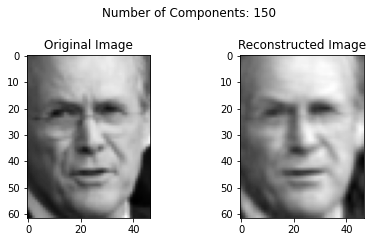

Mean Squared Error for 150 components = 73.349075
                   precision    recall  f1-score   support

     Colin Powell       0.84      0.83      0.84        78
  Donald Rumsfeld       0.78      0.76      0.77        38
    George W Bush       0.87      0.89      0.88       159
Gerhard Schroeder       0.78      0.83      0.81        30
       Tony Blair       0.82      0.73      0.77        37

         accuracy                           0.84       342
        macro avg       0.82      0.81      0.81       342
     weighted avg       0.84      0.84      0.84       342



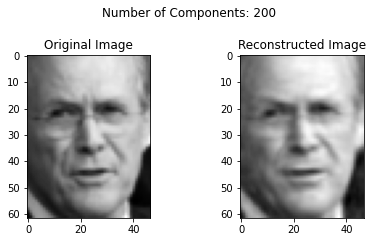

Mean Squared Error for 200 components = 46.542953
                   precision    recall  f1-score   support

     Colin Powell       0.90      0.82      0.86        78
  Donald Rumsfeld       0.76      0.66      0.70        38
    George W Bush       0.85      0.91      0.88       159
Gerhard Schroeder       0.85      0.73      0.79        30
       Tony Blair       0.71      0.78      0.74        37

         accuracy                           0.83       342
        macro avg       0.81      0.78      0.79       342
     weighted avg       0.83      0.83      0.83       342



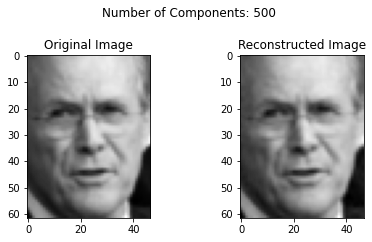

Mean Squared Error for 500 components = 4.300186
                   precision    recall  f1-score   support

     Colin Powell       0.94      0.77      0.85        78
  Donald Rumsfeld       0.70      0.79      0.74        38
    George W Bush       0.89      0.89      0.89       159
Gerhard Schroeder       0.77      0.77      0.77        30
       Tony Blair       0.68      0.86      0.76        37

         accuracy                           0.84       342
        macro avg       0.80      0.82      0.80       342
     weighted avg       0.85      0.84      0.84       342



In [ ]:
num_comp = np.array([150,200,500])
for i in range(len(num_comp)):
  face_class(num_comp[i])

Bonus : Try using eigenfaces to recognize images of animal faces.
